In [24]:
import sys

sys.path.append("../")

import pandas as pd
import numpy as np
import datetime
import os
from pprint import pprint
import matplotlib.pyplot as plt
import time
import vectorbtpro as vbt
from time import time
import helpers as pth
import platform
from dotenv import load_dotenv
import scipy.stats as stats
import time

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 20)

plt.style.use("classic")
# plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["axes.formatter.limits"] = [-1000000000, 1000000000]


if platform.system().lower() == "windows":
    base_data_path = "H:\\phitech-data\\01_raw"
else:
    from core_chains.simple.llm import make_Q_chain

    base_data_path = "../../phitech-data/01_raw"
    load_dotenv("../../sandatasci-core/credentials")
    Q = make_Q_chain("gpt-4o-instance1", __vsc_ipynb_file__)

In [25]:
%%html
<style>
.dataframe {
    font-size: 9pt; /* Adjust font size as needed */
}
</style>

In [26]:
I = pth.load_instruments(base_path=base_data_path)
I.keys()

dict_keys(['6B', 'MES'])

In [27]:
I["6B"].vbt.to_2d_array()

array([[  1.2708,   1.2715,   1.2705, ...,   1.271 , 274.    , 269.    ],
       [  1.2706,   1.2707,   1.2706, ...,   1.2706,  18.    ,  55.    ],
       [  1.2707,   1.2707,   1.2706, ...,   1.2706,  58.    ,  15.    ],
       ...,
       [  1.2928,   1.2928,   1.2927, ...,   1.2927,  13.    ,  25.    ],
       [  1.2928,   1.2929,   1.2928, ...,   1.2929,   1.    ,  39.    ],
       [  1.2929,   1.2929,   1.2929, ...,   1.2929,  17.    ,  13.    ]])

In [28]:
I["6B"].iloc[:1024].close.vbt.plot()

FigureWidget({
    'data': [{'name': 'close',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'fa21356a-a368-4c8e-afd4-04998978e454',
              'x': array([datetime.datetime(2024, 5, 19, 23, 0),
                          datetime.datetime(2024, 5, 19, 23, 1),
                          datetime.datetime(2024, 5, 19, 23, 2), ...,
                          datetime.datetime(2024, 5, 20, 18, 17),
                          datetime.datetime(2024, 5, 20, 18, 18),
                          datetime.datetime(2024, 5, 20, 18, 19)], dtype=object),
              'y': array([1.2706, 1.2707, 1.2707, ..., 1.2727, 1.2726, 1.2724])}],
    'layout': {'height': 350,
               'legend': {'orientation': 'h',
                          'traceorder': 'normal',
                          'x': 1,
                          'xanchor': 'right',
                          'y': 1.02,
                          'yanchor': 'bottom'},
               'margin': {'b': 30, 'l'

In [29]:
ds = I["6B"].close.iloc[:1024].vbt.drawdowns
ds.readable.head()

,Drawdown Id,Column,Start Index,Valley Index,End Index,Start Value,Valley Value,End Value,Status
0,0,close,2024-05-19 23:05:00,2024-05-19 23:07:00,2024-05-19 23:26:00,1.2708,1.2706,1.2708,Recovered
1,1,close,2024-05-19 23:29:00,2024-05-20 00:00:00,2024-05-20 00:04:00,1.2708,1.2705,1.2708,Recovered
2,2,close,2024-05-20 00:14:00,2024-05-20 00:15:00,2024-05-20 00:17:00,1.2709,1.2708,1.2709,Recovered
3,3,close,2024-05-20 00:22:00,2024-05-20 00:25:00,2024-05-20 00:27:00,1.2710,1.2709,1.2710,Recovered
4,4,close,2024-05-20 00:31:00,2024-05-20 00:33:00,2024-05-20 00:38:00,1.2712,1.2711,1.2712,Recovered


In [30]:
ds.status.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [52]:
ds.get_apply_mapping_arr("status")

array(['Recovered', 'Recovered', 'Recovered', 'Recovered', 'Recovered',
       'Recovered', 'Recovered', 'Recovered', 'Recovered', 'Recovered',
       'Recovered', 'Recovered', 'Recovered', 'Recovered', 'Recovered',
       'Recovered', 'Recovered', 'Recovered', 'Active'], dtype=object)

In [38]:
ds.drawdown

In [44]:
ds.drawdown.values

array([-1.57381177e-04, -2.36071766e-04, -7.86843969e-05, -7.86782061e-05,
       -7.86658276e-05, -8.65256037e-04, -6.29277118e-04, -7.86596397e-05,
       -7.86472670e-05, -1.57294534e-03, -8.64983880e-04, -7.86225332e-05,
       -7.86163522e-05, -1.57232704e-04, -7.86101722e-05, -7.85978150e-05,
       -7.85916378e-05, -7.85854617e-05, -4.71327573e-04])

In [48]:
ds.drawdown.stats(column='close')

Start Index       2024-05-19 23:00:00
End Index         2024-05-20 18:19:00
Total Duration        0 days 17:04:00
Count                              19
Mean                        -0.000306
Std                          0.000407
Min                         -0.001573
Median                      -0.000079
Max                         -0.000079
Min Index         2024-05-20 15:31:00
Max Index         2024-05-20 18:07:00
Name: close, dtype: object

<Axes: xlabel='timestamp'>

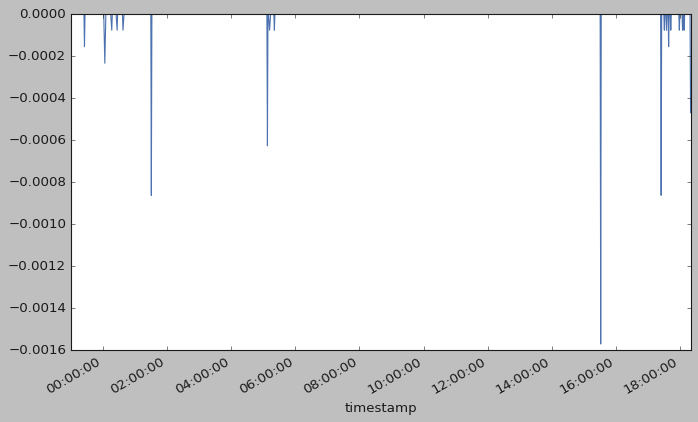

In [52]:
ds.drawdown.to_pd().fillna(0).plot()